In [ ]:
import pandas as pd
import numpy as np
import sys
import os
from openpyxl import load_workbook
import scipy.spatial
import math
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/marged_vf50_new_fine.xlsx')



In [ ]:
df.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,y1,y2,y3,y4,y5,y6,y7,y8,X_coord,Y_coord,M_pri
0,0,765.271009,666.870681,722.410885,667.919567,805.445562,887.278939,633.752004,742.285757,1830.599870,1933.275480,2012.918446,1841.599085,2012.654217,1923.997970,2009.692051,1750.447278,747.762872,1910.918636,11.899739
1,1,2075.773702,2110.127022,2130.091560,2183.504359,2267.728348,2023.988573,2210.397745,1997.306689,1420.364109,1534.803872,1356.222470,1574.123014,1461.665092,1523.451900,1330.763839,1444.447757,2147.312089,1460.817004,13.164721
2,2,655.102333,611.311029,815.309357,748.304981,745.501802,831.632011,538.147185,687.191953,2835.487109,2951.149401,2908.051238,3016.444659,2791.120302,2990.302604,2841.587020,3088.366262,701.493258,2904.973001,10.571309
3,3,231.356742,78.010319,63.377021,166.286520,228.818338,127.816732,-2.138147,302.676470,1737.093857,1676.685934,1777.174690,1832.280983,1639.310132,1580.922891,1719.708493,1778.908065,148.610916,1727.450524,19.470829
4,4,3438.755882,3425.902416,3346.904098,3343.424495,3476.514511,3389.877396,3479.513080,3266.567944,2675.692976,2843.918425,2698.649523,2802.818827,2558.189832,2583.889128,2949.296322,2734.150739,3490.474141,2741.386607,11.453999


In [ ]:
df.shape

(63667, 20)

In [ ]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y1',
       'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'X_coord', 'Y_coord',
       'M_pri'],
      dtype='object')

Dropping Unnecessary features 

In [ ]:
df = df.drop(['Unnamed: 0'] , axis = 1)
dataset = df.values
dataset

Y = dataset[: , 18]

df = df.drop(['M_pri','x5', 'x6', 'x7', 'x8','y5', 'y6', 'y7', 'y8'],axis=1)
df.columns
dataset = df.values
X= dataset[:,:]

Train-Test split and Normalisation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))
Y_test = StandardScaler().fit_transform(Y_test.reshape(len(Y_test),1))[:,0]
Y_train = StandardScaler().fit_transform(Y_train.reshape(len(Y_train),1))[:,0]

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


RandomForest Regressor

In [ ]:
 from sklearn.ensemble import RandomForestRegressor

 model = RandomForestRegressor(random_state = 1)
 model.fit(X_train , Y_train)
 pred =  model.predict(X_test)
 
 from sklearn.metrics import mean_squared_error
 mse = mean_squared_error(Y_test , pred)

 mse

0.6046413905317709

MAE: 0.6022163241952256


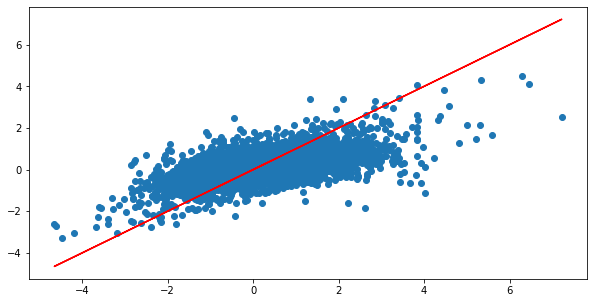

In [ ]:
Y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))  
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(Y_test,Y_pred)
# Perfect predictions
plt.plot(Y_test,Y_test,'r')

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.3953586094682292

Feature Importance Based on Feature permutation

In [ ]:
import time
import numpy as np

In [ ]:

feature_names = [i for i in df.columns]
feature_names=np.array(feature_names)

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    model, X_test, Y_test, n_repeats=10, random_state=42
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 61.820 seconds


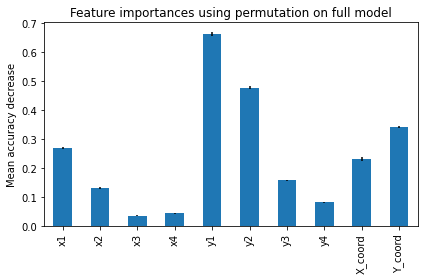

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Feature Importance Basesed on Mean Decrease in Impurity

In [ ]:

start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.172 seconds


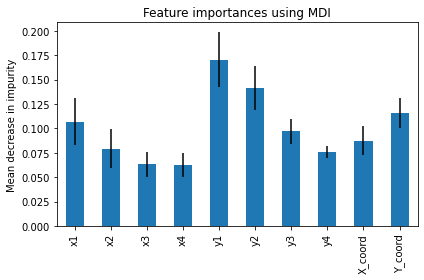

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Retrain Data Using Important Features

In [ ]:
df = pd.read_excel('/content/marged_vf40.xlsx')

In [ ]:
df = df.drop(['Unnamed: 0','radius','region','set'] , axis = 1)
dataset = df.values
dataset

Y = dataset[: , 2]

df = df.drop(['M_pri','S_11','S_22','S_33','S_12','NNPA','NND6', 'NND7', 'NND8','AVG_NND6','AVG_NND8','NNA7','NNA8','VF_4R','vf_5r', 'vf_7r', 'vf_8r','x1','y1'],axis=1)
df.columns
dataset = df.values
X= dataset[:,:]

In [ ]:
df.columns

Index(['X_coord', 'Y_coord', 'NND1', 'NND2', 'NND3', 'NND4', 'NND5',
       'AVG_NND2', 'AVG_NND4', 'NNA1', 'NNA2', 'VF_3R', 'NNA3', 'NNA4', 'NNA5',
       'NNA6', 'vf_6r'],
      dtype='object')

In [ ]:
# df = df.drop(['Unnamed: 0','radius','region','set'] , axis = 1)
# dataset = df.values
# dataset
# 
# Y = dataset[: , 3]
# df = df.drop(['NNA1', 'NNA2', 'NNA3', 'NNA4', 'NNA5', 'NNA6','M_pri','S_11','S_22','S_33','S_12'] , axis = 1)
# df = df.drop(['M_pri','S_11','S_22','S_33','S_12'] , axis = 1)
# dataset = df.values
# X= dataset[:,:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))
Y_test = StandardScaler().fit_transform(Y_test.reshape(len(Y_test),1))[:,0]
Y_train = StandardScaler().fit_transform(Y_train.reshape(len(Y_train),1))[:,0]

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
 from sklearn.ensemble import RandomForestRegressor

 model = RandomForestRegressor(random_state = 1)
 model.fit(X_train , Y_train)
 pred =  model.predict(X_test)
 
 from sklearn.metrics import mean_squared_error
 mse = mean_squared_error(Y_test , pred)

 mse

0.28132923468927934

MAE: 0.3957101324221933


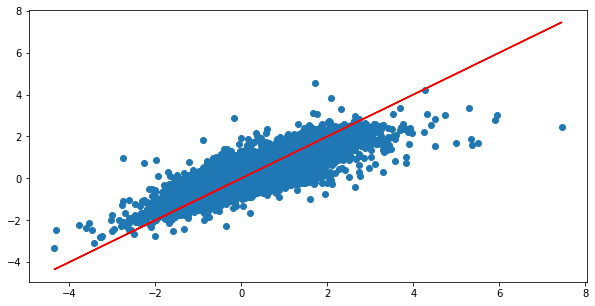

In [ ]:
Y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))  
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(Y_test,Y_pred)
# Perfect predictions
plt.plot(Y_test,Y_test,'r')


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.7186707653107207